# Proyek Analisis Data: Bike Sharing
- **Nama:** Naomi Sitanggang
- **Email:** naomistg5@gmail.com
- **ID Dicoding:** MC006D5X1986

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Tren Penyewaan Sepeda dari Tahun ke Tahun?
- Pertanyaan 2 : Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Musim?
- Pertanyaan 3 : Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Hari?
- Pertanyaan 4 : Pada Jam Berapa Jumlah Penyewaan Sepeda Mencapai Puncaknya?
- Pertanyaan 5 : Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Bulan?
- Pertanyaan 6 : Bagaimana Perbedaan Jumlah Penyewaan Sepeda pada Hari Kerja vs Hari Libur?
- Analisis lanjutan : Bagaimana Hasil Clustering Penyewaan Sepeda?

## Import Semua Packages/Library yang Digunakan

In [64]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
sns.set(style="whitegrid")

**Insight:**
Import zip file dari folder

## Data Wrangling

### Gathering Data

In [65]:


zip_path = "/content/Bike-sharing-dataset.zip"
extract_path = "/content/bike_data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.listdir(extract_path)


['Readme.txt', 'hour.csv', 'day.csv']

In [66]:
day_df = pd.read_csv(os.path.join(extract_path, "day.csv"))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Memuat data tabel day lalu membuat data frame

In [67]:
hour_df = pd.read_csv(os.path.join(extract_path, "hour.csv"))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Memuat data tabel hour lalu membuat data frame

### Assessing Data

In [68]:
# Menilai data day_df
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = day_df[(day_df["cnt"] < lower_bound) | (day_df["cnt"] > upper_bound)]
print(f"Jumlah outlier dalam data penyewaan sepeda harian: {len(outliers)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
Jumlah outlier dalam data penyewaan sepeda harian: 0


**Insight:**
Dari pemeriksaan data, terdapat kesalahan tipe data untuk kolom dteday, seharusnya direpresentasikan sebagai tipe data datetime bukan object

In [69]:
# Menilai data hour_df
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = hour_df[(hour_df["cnt"] < lower_bound) | (hour_df["cnt"] > upper_bound)]
print(f"Jumlah outlier dalam data penyewaan sepeda per jam: {len(outliers)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0
Jumlah outlier dalam data pe

**Insight:**
- Dari pemeriksaan data, terdapat kesalahan tipe data untuk kolom dteday, seharusnya direpresentasikan sebagai tipe data datetime bukan object
- Terdapat outlier dalam data sebanyak 505 sehingga diperlukan penanganan

### Cleaning Data

In [70]:
# Menangani kesalahan tipe data
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Kolom dteday sudah berubah menjadi tipe data datetime

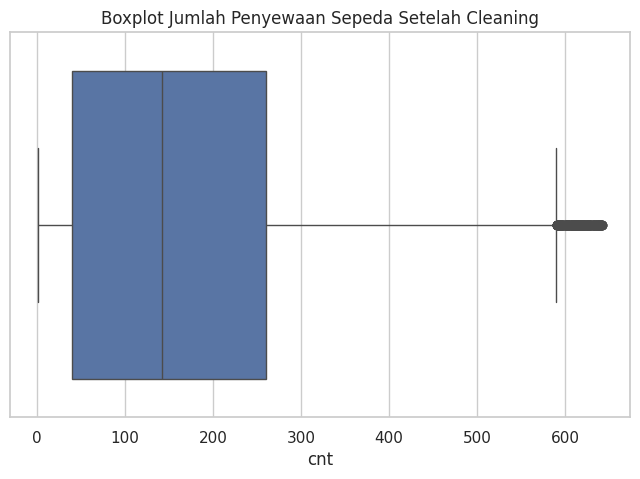

In [71]:
# Menangani outlier data hour_df
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

hour_df['cnt'] = hour_df['cnt'].mask((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound), hour_df['cnt'].median())

plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda Setelah Cleaning")
plt.show()


**Insight:**
- Mengganti outlier dengan nilai median dengan menggunakan metode Imputation


## Exploratory Data Analysis (EDA)

### Explore data day_df

In [72]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
Melihat rangkuman parameter statistik dari data day_df menggunakan metode describe()

In [73]:
# Tren tahunan
yearly_trend = day_df.groupby('yr')['cnt'].agg(['sum', 'mean'])
print("Tren Tahunan:")
print(yearly_trend)

# Tren bulanan (contoh 2011 vs 2012)
monthly_comparison = day_df.pivot_table(
    index='mnth',
    columns='yr',
    values='cnt',
    aggfunc='mean'
)
print("\nRata-Rata Harian per Bulan (2011 vs 2012):")
print(monthly_comparison)


Tren Tahunan:
        sum         mean
yr                      
0   1243103  3405.761644
1   2049576  5599.934426

Rata-Rata Harian per Bulan (2011 vs 2012):
yr              0            1
mnth                          
1     1231.903226  3120.774194
2     1721.964286  3556.448276
3     2065.967742  5318.548387
4     3162.333333  5807.466667
5     4381.322581  6318.225806
6     4783.733333  6761.000000
7     4559.387097  6567.967742
8     4409.387097  6919.451613
9     4247.266667  7285.766667
10    3984.225806  6414.225806
11    3405.566667  5088.800000
12    2816.870968  3990.741935


**Insight:**
Terjadi peningkatan signifikan dalam jumlah penyewaan dari tahun 2011 ke 2012 baik dalam total keseluruhan maupun rata-rata harian.

In [74]:
# Korelasi Pearson
corr_temp = day_df[['temp', 'cnt']].corr().iloc[0,1]
print(f"\nKorelasi Suhu-Penyewaan: {corr_temp:.2f}")

# Analisis kategori suhu
temp_bins = pd.cut(day_df['temp'], bins=[0, 0.3, 0.6, 1], labels=["Dingin", "Moderat", "Panas"])
temp_analysis = day_df.groupby(temp_bins)['cnt'].mean()
print("\nRata-Rata Penyewaan per Kategori Suhu:")
print(temp_analysis)


Korelasi Suhu-Penyewaan: 0.63

Rata-Rata Penyewaan per Kategori Suhu:
temp
Dingin     2381.214815
Moderat    4488.178363
Panas      5654.559055
Name: cnt, dtype: float64


<ipython-input-74-8e433996edcc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = day_df.groupby(temp_bins)['cnt'].mean()


**Insight:**
Melihat korelasi antara suhu dan jumlah penyewaan terlihat nilainya cukup kuat artinya terdapat hubungan yang cukup kuat dan suhu dikategorikan menjadi tiga kategori yaitu dingin, moderat, dan panas

In [75]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

instant      temp                             
           nunique       max      min      mean       std
weathersit                                               
1              463  0.861667  0.05913  0.511541  0.191165
2              247  0.815000  0.10750  0.470366  0.167180
3               21  0.633913  0.21750  0.433440  0.131473

**Insight:** Berdasarkan pivot table di atas, dapat diketahui bahwa penyewa yang kita miliki didominasi oleh weathersit 1

In [76]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)


,instant
temp,
0.265833,5
0.635000,5
0.680000,4
0.710833,4
0.649167,4
...,...
0.390000,1
0.389167,1
0.389091,1


**Insight:** Persebaran penyewa cukup merata pada setiap kelembapan dan suhu. Persebaran paling banyak di suhu 0.26 dan 0.63

### Explore data hour_df

In [77]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,171.817769
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,260.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,152.838957


**Insight:**
Melihat rangkuman parameter statistik dari data hour_df menggunakan metode describe()

In [78]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)


,instant
temp,
0.265833,5
0.635000,5
0.680000,4
0.710833,4
0.649167,4
...,...
0.390000,1
0.389167,1
0.389091,1


**Insight:** Persebaran penyewa cukup merata pada setiap kelembapan dan suhu. Persebaran paling banyak di suhu 0.26 dan 0.63

In [79]:

hourly_peak = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print("\nTop 5 Jam Puncak:")
print(hourly_peak.head(5))


Top 5 Jam Puncak:
hr
17    324.230137
18    312.657967
16    303.058904
19    301.350275
8     259.627235
Name: cnt, dtype: float64


**Insight:** Puncak tertinggi penyewaan sepeda pada jam 17.00 hal ini bisa terjadi karena banyaknya orang yang pulang kerja atau sekolah

In [80]:
workday_stats = hour_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'std'])
print("\nAnalisis Hari Kerja vs Akhir Pekan:")
print(workday_stats)


Analisis Hari Kerja vs Akhir Pekan:
                 mean  median         std
workingday                               
0           172.40370   119.0  159.930352
1           171.54547   142.0  149.435031


**Insight:** Terlihat bahwa nilai rata-rata, nilai tengah dan simpangan baku paling besar pada hari kerja, hal ini mengindikasikan banyaknya penyewa lebih banyak di hari kerja dibandingkan hari libur

### Explode data day_df & data hour_df

In [81]:
# Menambah kolom keterangan
day_df["keterangan"] = "day"
hour_df["keterangan"] = "hour"

# Menggabungkan data day_df & data hour_df
combined_df = pd.concat([day_df,hour_df])

# Menghitung rata-rata temp per keterangan
temp_avg = combined_df.groupby("keterangan")["temp"].mean()
print(temp_avg)

keterangan
day     0.495385
hour    0.496987
Name: temp, dtype: float64


**Insight:**
Menghitung rata-rata suhu dari keterangan data gabungan

In [82]:
data_bike = {"day": day_df, "hour": hour_df}
all_df = pd.concat(data_bike.values(),ignore_index=True)

**Insight:**
Menggabungkan dua tabel data menjadi satu data frame

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penyewaan Sepeda dari Tahun ke Tahun?

Jumlah data setelah difilter: 18110


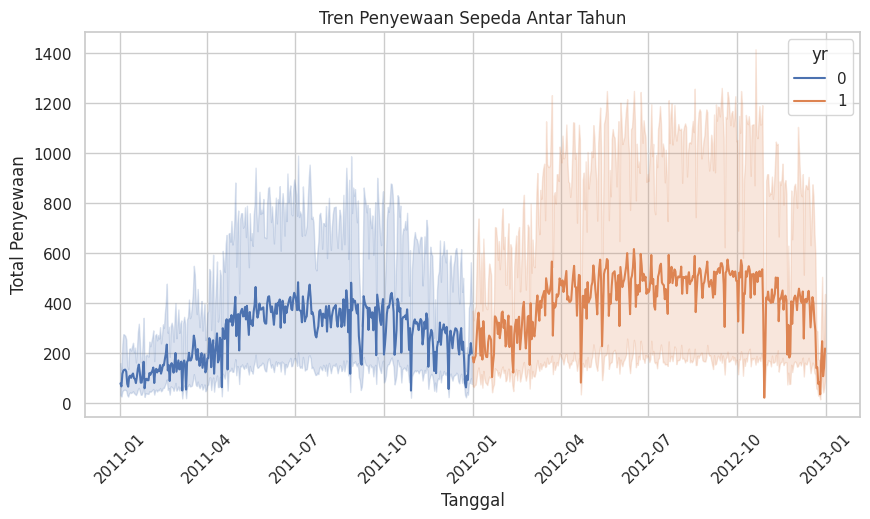

In [83]:
# Rentang tanggal
start_date = all_df['dteday'].min()
end_date = all_df['dteday'].max()

# Filter musim
season_filter = [1, 2, 3, 4]  # Pilih semua musim

# Filter berdasarkan kondisi tertentu
filtered_df = all_df[
    (all_df['dteday'] >= start_date) &
    (all_df['dteday'] <= end_date) &
    (all_df['season'].isin(season_filter))
]

# Tampilkan jumlah data setelah difilter
print(f"Jumlah data setelah difilter: {filtered_df.shape[0]}")

plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_df, x="dteday", y="cnt", hue="yr")
plt.xticks(rotation=45)
plt.title("Tren Penyewaan Sepeda Antar Tahun")
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")
plt.show()


**Insight:**
Grafik ini menunjukkan bagaimana tren penyewaan berubah antara dua tahun yang berbeda. Jika ada tren peningkatan dari tahun ke tahun, berarti program penyewaan sepeda semakin populer.
Jika ada tren penurunan, mungkin disebabkan oleh perubahan kebijakan, infrastruktur, atau faktor eksternal. Dari grafik terlihat adanya peningkatan tren dari tahun 2011 ke tahun 2012.




### Pertanyaan 2: Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Musim?



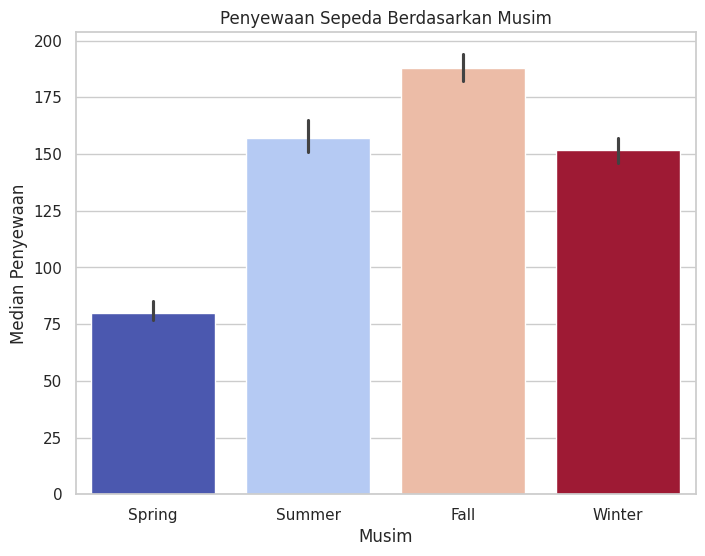

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=filtered_df,
    x=filtered_df['season'].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}),
    y='cnt',
    estimator=np.median,
    palette='coolwarm',
    hue='season',
    legend=False
)

plt.xlabel("Musim")
plt.ylabel("Median Penyewaan")
plt.title("Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
Grafik ini menggambarkan bagaimana jumlah penyewaan sepeda berubah di setiap musim.
- Musim gugur (Fall) cenderung memiliki jumlah penyewaan tertinggi.
- Musim dingin (Winter) dan musim panas (Summer) juga memiliki angka yang cukup tinggi.
- Musim semi (Spring) memiliki jumlah penyewaan paling rendah, kemungkinan karena cuaca yang kurang kondusif untuk bersepeda.

### Pertanyaan 3 :  Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Hari

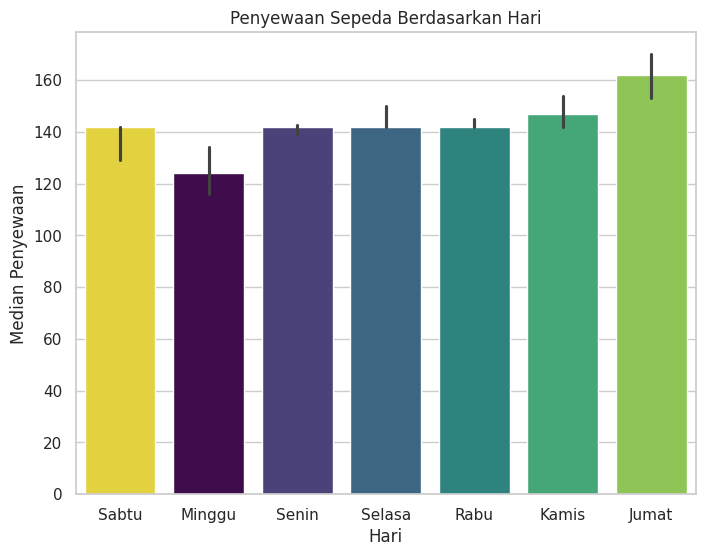

In [85]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=filtered_df,
    x=filtered_df['weekday'].map({0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu",
                                   4: "Kamis", 5: "Jumat", 6: "Sabtu"}),
    y='cnt', estimator=np.median, palette='viridis', hue='weekday', legend=False
)
plt.xlabel("Hari")
plt.ylabel("Median Penyewaan")
plt.title("Penyewaan Sepeda Berdasarkan Hari")
plt.show()


**Insight:**
 Grafik ini menunjukkan perbedaan jumlah penyewaan sepeda pada hari-hari tertentu dalam seminggu.
- Hari kerja (Senin - Jumat) memiliki penyewaan yang lebih tinggi, menunjukkan bahwa sepeda banyak digunakan untuk keperluan kerja atau transportasi sehari-hari.
- Hari libur (Sabtu & Minggu) memiliki sedikit penurunan jumlah penyewaan, kemungkinan karena lebih banyak orang libur dan menggunakan moda transportasi lain.

### Pertanyaan 4 : Pada Jam Berapa Jumlah Penyewaan Sepeda Mencapai Puncaknya?

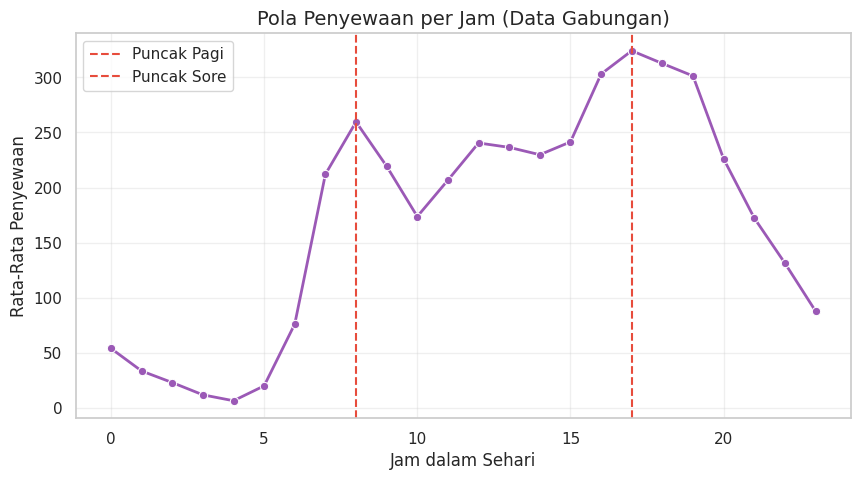

In [86]:
# Asumsi kolom 'hr' ada di hour_df
hourly_peak = all_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(
    x=hourly_peak.index,
    y=hourly_peak.values,
    color='#9b59b6',
    marker='o',
    linewidth=2
)

plt.title('Pola Penyewaan per Jam (Data Gabungan)', fontsize=14)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-Rata Penyewaan', fontsize=12)
plt.axvline(x=8, color='#e74c3c', linestyle='--', label='Puncak Pagi')
plt.axvline(x=17, color='#e74c3c', linestyle='--', label='Puncak Sore')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Insight:**
 Grafik ini memperlihatkan pola penyewaan sepeda dalam 24 jam. Ada dua puncak utama dalam penyewaan sepeda:
- Puncak Pagi (sekitar jam 8 pagi) → Kemungkinan besar digunakan untuk pergi ke kantor/sekolah.
- Puncak Sore (sekitar jam 17 sore) → Menunjukkan peningkatan ketika orang pulang kerja/sekolah.

Selama siang hari (10:00 - 16:00), jumlah penyewaan cenderung lebih stabil.
Malam hari (setelah jam 20:00) menunjukkan penurunan yang signifikan, karena lebih sedikit orang yang bersepeda di malam hari.


### Pertanyaan 5 :  Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Bulan?

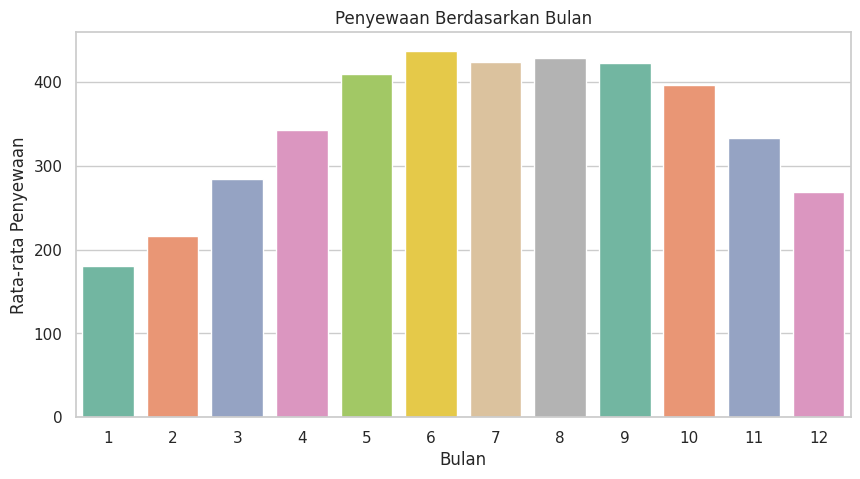

In [87]:
monthly_avg = filtered_df.groupby("mnth")["cnt"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=monthly_avg, palette="Set2", hue="mnth", legend=False)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Penyewaan Berdasarkan Bulan")
plt.show()


**Insight:**
Grafik ini menunjukkan jumlah rata-rata penyewaan sepeda setiap bulan dalam setahun.
- Penyewaan sepeda cenderung meningkat selama bulan April - Oktober, yang menunjukkan bahwa cuaca yang lebih hangat dan lebih lama terang mempengaruhi penggunaan sepeda.
- Pada bulan Desember - Februari, jumlah penyewaan cenderung turun, kemungkinan karena kondisi cuaca yang lebih buruk.

### Pertanyaan 6  :  Bagaimana Perbedaan Jumlah Penyewaan Sepeda pada Hari Kerja vs Hari Libur?

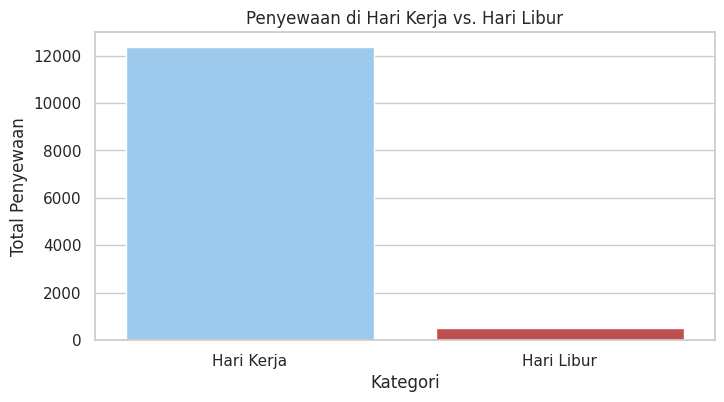

In [88]:
df_plot = pd.DataFrame({'Kategori': ['Hari Kerja', 'Hari Libur'],
                        'Total': [filtered_df['workingday'].sum(), filtered_df['holiday'].sum()]})

plt.figure(figsize=(8, 4))
sns.barplot(data=df_plot, x="Kategori", y="Total", hue="Kategori", palette=["#90CAF9", "#D33D3D"], legend=False)
plt.ylabel("Total Penyewaan")
plt.title("Penyewaan di Hari Kerja vs. Hari Libur")
plt.show()

**Insight**
Grafik ini membandingkan jumlah penyewaan sepeda pada hari kerja dan hari libur.
- Hari kerja memiliki lebih banyak penyewaan dibandingkan hari libur, yang menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter.
- Hari libur masih memiliki jumlah penyewaan yang cukup tinggi, hal ini bisa disebabkan karena tidak begitu banyak orang yang bepergian.


## Analisis Lanjutan

### Clustering : Banyaknya Penyewaan Sepeda

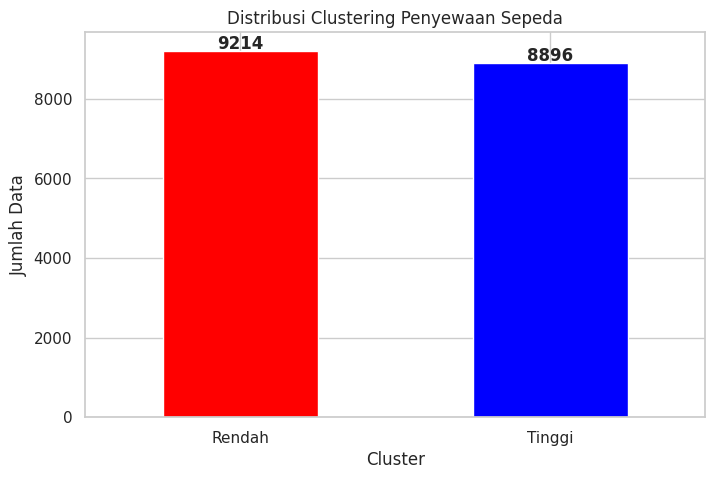

In [89]:
def cluster_cnt(value):
   return "Rendah" if value < 2000 else "Tinggi"

# Terapkan fungsi clustering
filtered_df["cluster"] = pd.qcut(filtered_df["cnt"], q=2, labels=["Rendah", "Tinggi"])


# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
bars = cluster_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Clustering Penyewaan Sepeda")
plt.xticks(rotation=0)

# Tambahkan label jumlah di atas setiap batang
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, str(int(bar.get_height())),
             ha='center', fontsize=12, fontweight='bold')

plt.show()

**Insight:**

Cluster Rendah untuk nilai < 2000 sebanyak 9214

Cluster Tinggi untuk nilai ≥ 2000  sebanyak 8896

### Conclusion

**Conclusion pertanyaan 1** : Berdasarkan grafik, tren penyewaan sepeda menunjukkan peningkatan dari tahun 2011 ke 2012, di mana jumlah penyewaan pada tahun kedua (2012) lebih tinggi secara keseluruhan dibandingkan tahun pertama (2011). Pada awal tahun 2011, jumlah penyewaan masih rendah, namun meningkat signifikan menjelang pertengahan tahun, mencapai angka sekitar 800 penyewaan per hari. Sementara itu, pada tahun 2012, jumlah penyewaan harian lebih konsisten dan cenderung lebih tinggi, bahkan sempat mencapai lebih dari 1.200 penyewaan per hari di beberapa waktu. Peningkatan ini bisa disebabkan oleh meningkatnya kesadaran masyarakat terhadap penggunaan sepeda sebagai transportasi, cuaca yang lebih mendukung, atau adanya kebijakan yang mendukung mobilitas bersepeda. Untuk mempertahankan tren positif ini, operator penyewaan sepeda dapat meningkatkan layanan, memperluas cakupan area penyewaan, serta menawarkan promo atau program loyalitas untuk menarik lebih banyak pengguna.

**Conclusion pertanyaan 2** : Berdasarkan grafik median, penyewaan sepeda berdasarkan median menunjukkan bahwa musim gugur memiliki angka tertinggi sekitar 190 penyewaan per periode, diikuti oleh musim panas dengan 160 penyewaan. Musim dingin tetap cukup stabil di angka 140, sementara musim semi memiliki median terendah sekitar 80 penyewaan. Hal ini menunjukkan bahwa tren penyewaan relatif konsisten di setiap musim, dengan musim gugur dan panas sebagai puncak tertinggi, sedangkan musim semi cenderung lebih rendah, kemungkinan akibat transisi cuaca yang kurang mendukung. Untuk meningkatkan penggunaan sepeda di musim dengan penyewaan lebih rendah, penyedia layanan dapat menawarkan promo atau inisiatif seperti jalur khusus yang lebih aman di musim dingin serta penyewaan dengan tarif lebih murah pada musim semi.

**Conclusion pertanyaan 3** : Berdasarkan  grafik median, penyewaan sepeda cenderung lebih tinggi pada hari kerja, dengan puncaknya terjadi pada hari Jumat sekitar 165 penyewaan per periode. Hari Kamis dan Rabu juga menunjukkan angka yang relatif tinggi, berkisar antara 140–150 penyewaan. Sementara itu, akhir pekan (Sabtu dan Minggu) memiliki variasi yang lebih besar, di mana Sabtu mencapai sekitar 140 penyewaan, sedangkan Minggu lebih rendah di angka 125. Pola ini menunjukkan bahwa penyewaan sepeda kemungkinan besar dipengaruhi oleh aktivitas harian, dengan peningkatan menjelang akhir pekan, mungkin karena mobilitas kerja dan aktivitas rekreasi.Oleh karena itu, strategi seperti diskon atau kerja sama dengan tempat wisata dapat diterapkan untuk meningkatkan penggunaan sepeda di akhir pekan.

**Conclusion pertanyaan 4**: Berdasarkan grafik, pola penyewaan sepeda menunjukkan dua puncak utama, yaitu puncak pagi sekitar jam 08.00 dengan lebih dari 250 penyewaan dan puncak sore sekitar jam 17.00 dengan lebih dari 300 penyewaan. Hal ini menunjukkan bahwa sepeda banyak digunakan sebagai sarana transportasi untuk pergi dan pulang kerja atau sekolah. Di antara kedua puncak tersebut, penyewaan cenderung stabil pada siang hari (10.00 - 16.00), sementara setelah jam 20.00 terjadi penurunan drastis, menandakan bahwa aktivitas bersepeda berkurang signifikan di malam hari. Wawasan ini dapat digunakan untuk strategi operasional, seperti penyesuaian ketersediaan sepeda di jam sibuk atau promosi khusus di luar jam puncak.

**Conclusion pertanyaan 5** : Berdasarkan grafik, jumlah rata-rata penyewaan sepeda meningkat signifikan dari April hingga Oktober, dengan puncak tertinggi terjadi pada bulan Juni sekitar 450 unit. Tren ini menunjukkan bahwa kondisi cuaca hangat dan lebih banyak jam siang berkontribusi terhadap meningkatnya penggunaan sepeda. Sebaliknya, pada bulan Desember hingga Februari, jumlah penyewaan turun drastis hingga sekitar 180–250 unit, kemungkinan besar karena cuaca yang lebih dingin dan kurang mendukung aktivitas luar ruangan. Dengan pola ini, strategi seperti promosi musiman, penyediaan perlengkapan untuk cuaca dingin, atau diskon khusus di musim sepi dapat membantu meningkatkan penggunaan sepeda sepanjang tahun.

**Conclusion pertanyaan 6** : Berdasarkan grafik, jumlah penyewaan sepeda pada hari kerja mencapai sekitar 12.000 unit, sedangkan pada hari libur hanya sekitar 1.000 unit, menunjukkan bahwa penyewaan di hari kerja sekitar 12 kali lebih tinggi. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk keperluan komuter dibandingkan aktivitas rekreasi. Dengan 92,3% penyewaan terjadi pada hari kerja dan hanya 7,7% pada hari libur, layanan penyewaan sepeda sangat bergantung pada mobilitas pekerja dan pelajar. Oleh karena itu, strategi seperti peningkatan ketersediaan unit di pusat perkantoran, promo langganan untuk pengguna rutin, serta diskon atau event bersepeda di akhir pekan dapat menjadi langkah efektif untuk mengoptimalkan penggunaan sepeda sepanjang minggu.


**Conclusion analisis lanjutan** : Berdasarkan hasil clustering jumlah penyewaan sepeda, terdapat dua kategori utama: "Rendah" dengan 9214 data yang memiliki data penyewa dibawah  2000 dan "Tinggi" dengan 8896 data yang memiliki penyewaan di atas 2000 . Dari hasil ini, terlihat bahwa jumlah hari dengan tingkat penyewaan rendah dan tinggi cenderung seimbang, dengan perbedaan yang tidak terlalu signifikan di antara kategori tersebut. Hal ini menunjukkan bahwa permintaan terhadap layanan penyewaan sepeda relatif stabil.

In [90]:
all_df.to_csv("all_data.csv", index=False)